
# Project 2: Data Wrangling - [WeRateDogs]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Gathering">Gathering data</a></li>
<li><a href="#Accessing">Accessing data</a></li>
<li><a href="#Cleaning">Cleaning data</a></li>
<li><a href="#storing">Storing data</a></li>
<li><a href="#eda">Analysing and Visualising data</a></li>
<li><a href="#conclusions">Conclusion and Report</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project investigates the data wrangling process using python and its library. It involves gathering of real- world data from different sources and formats after which the data are access for quality and tidiness issues to be cleaned. The dataset are merged and stored as a tidy master dataset after cleaning for further analysis and visualizytion. All process invloved were carefully documented using a Jupyter notebook. The python libraries used are: Numpy, Pandas, Request, Json, io, itertools, matplotlib and seaborn.

### Data Description 
The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The project worked with three dataset which are as explained below:

#### Enhanced Twitter Archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets,only tweets with ratings were filtered to get a total of 2356 data. 

#### Image Predictions File
The images from the WeRateDogs twitter archive was run through a neural network which is designed to classify dogs breed. The result was atable of top three images predictions, the twitter Id, image url and the image number that corresponded to the most coefficient.

#### Tweet JSON
This was extracted programmatically using twitter API tweepy. 


<a id='Gathering'></a>

## Data Gathering

> In this section, we start by importing all the relevant python libraries and proceed with gathering the data from the various source.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing all libraries 

import pandas as pd
import numpy as np
import requests
import json
import io
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from io import BytesIO

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', 200)

> 1. In this cell we directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and assign it to variable `df_twitter_enh`.

In [4]:
df_twitter_enh=pd.read_csv('twitter-archive-enhanced.csv')

> 2. In this cell we programmatically download the tweet image prediction (image_predictions.tsv) using the Requests library and assign it to variable `df_image_pred`

In [5]:
#Programmatical download using request.
# get the url using request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save and read the tsv file.
df_image_pred=pd.read_csv(io.StringIO(response.text),sep='\t')

>3. In the next cell, read tweet_jason data line by line and extracted three columns which are the `tweet_id`, `favorite_count` and `retweet_count` into a list. The list is then converted into a pandas dataframe. The `tweet_json.txt` data was downloaded from the tweeter website using the tweepy API.

In [6]:
#Create an empty list
df_tweet=[]
txt_file='tweet_json.txt'

#Read the text file line after line and store as tweet_df variable
with open(txt_file) as file:
    for line in file.readlines():
        tweet_df=json.loads(line)
        
        #Extract tweet_id
        tweet_id=tweet_df['id']
        #extract retweet_count
        retweet_count=tweet_df['retweet_count']
        #extract favourite_count
        favourite_count=tweet_df['favorite_count']
        
        #append to the empty list created 
        df_tweet.append({"tweet_id":tweet_id, "retweet_count":retweet_count, "favourite_count":favourite_count})

#convert the list to a dataframe
tweet_data=pd.DataFrame(df_tweet)

The three data set we will be working with are now ready to be accessed for quality and tidiness issues.

<a id='Accessing'></a>
## Accessing Data
> Having gathered the three required data. It is time to access both visually and programmatically in other to fish quality and tidines issues in the three dataset. The objective is to fish out at least 8 quality issues and 2 tidiness issues in the three dataset. Quality issues takes into consideration the following factors:
>1. Completeness
>2. Validity
>3. Accuracy
>4. Consistency

> While tidiness looks out for three factors which are:
>1. Make sure each variable forms a column
>2. Make sure each observation forms a row
>3. Finally make sure each type of observational unit forms a table

### Enhanced Twitter achive  `df_twitter_enh`

#Visualizing the first few rows of the dataframe
df_twitter_enh.head()

#### Observations
> Quality issues:
>1. Each elements in the `text` column ends with an http link,
>2. The `source` column contains http tags,

> Tidiness issues:
>1. Columns names, `doggo`, `floofer`, `pupper`, and `puppo` are observations of the dog stage which should be registered as a row under a column.


In [7]:
#Random visualisation of 5 rows in the dataset
df_twitter_enh.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Pupper is a present to world. Here is a bow for pupper."" 12/10 precious as hell https://t.co/ItSsE92gCW",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154249383937/photo/1,12,10,a,None,None,pupper,None
505,812781120811126785,NaN,NaN,2016-12-24 22:04:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Swagger. He's the Cleveland Browns ambassador. Hype as h*ck after that first win today. 10/10 https://t.co/lXFM1l22bG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1,https://twitter.com/dog_rates/status/812781120811126785/photo/1",10,10,Swagger,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
316,834931633769889797,NaN,NaN,2017-02-24 01:03:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He decided it was time to part ways with his favorite ball. We captured the emotional farewell on camera. 12/10 https://t.co/jTe7Y6P0HK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/834931633769889797/photo/1,https://twitter.com/dog_rates/status/834931633769889797/photo/1,https://twitter.com/dog_rates/status/834931633769889797/photo/1",12,10,Tucker,None,None,None,None
1512,691321916024623104,NaN,NaN,2016-01-24 18:09:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Molly. She's a Peruvian Niddlewog. Loves her new hat. 11/10 would totally pet https://t.co/g4fiS8A9Ab,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691321916024623104/photo/1,11,10,Molly,None,None,None,None


#### Observations
> Quality issues:

>3."None" is used to store missing valuues in the `name` column.

In [8]:
# Programmatically viewing a summary of the dataframe including, 
#the number of non-null values and the dataypes in each columns.
df_twitter_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Observations
> Quality issues:

>4. `tweet_id` column is of int datatype instead of string,
>5. `time_stamp` column is of string datatype instead of datetime,
>6. There 181 rows of retweets as indicated in the, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns.
>7. There 78 replies as indicated in the, `in_reply_to_status_id` and `in_reply_to_user_id` columns. 



In [9]:
#Summary statistics of the numerical columns in the data.
df_twitter_enh.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Observations

The `rating_numerator` and `rating_denominator` has an odd max and min value hence need further investigation.

In [10]:
#Get the frequency of each observations
df_twitter_enh.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

The WeRateDogs rating system is almost always over 10, however, we see from above ratings which are not over 10.

#### Observations
> Quality issues:

>8.`rating_denominator` has incorrect rating values. 

In [11]:
#Frequency of each observation
df_twitter_enh.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

Here we observe high ranges of ratings from min of 0 to maximum of 1776. Let us view it further 

In [12]:
#Number of ratings that are over 15
df_twitter_enh[df_twitter_enh['rating_numerator']>15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


We observe cases of float of decimal valued numerators which were incorrectly extracted. 

#### Observations
> Quality issues:

>9. Overhyped ratings and incorrect rating values in the `rating_numerator` column. 

Lets now take a look at the image prediction data.

### Image Prediction  `df_image_pred`

In [13]:
#Visualise the first few lines
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
#Visualise random samples 5 lines
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
760,688828561667567616,https://pbs.twimg.com/media/CY816snW8AYltrQ.jpg,1,Cardigan,0.614231,True,skunk,0.139392,False,toilet_tissue,0.031158,False
1693,816014286006976512,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True
731,686683045143953408,https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg,1,Norwich_terrier,0.100499,True,cocker_spaniel,0.080671,True,golden_retriever,0.079406,True
958,705475953783398401,https://pbs.twimg.com/media/CcpaoR9WAAAKlJJ.jpg,1,golden_retriever,0.908784,True,Labrador_retriever,0.030361,True,tennis_ball,0.004996,False
313,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True


##### Note

>tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921

>p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever

>p1_conf is how confident the algorithm is in its #1 prediction → 95%

>p1_dog is whether or not the #1 prediction is a breed of dog → TRUE

>p2 is the algorithm's second most likely prediction → Labrador retriever

>p2_conf is how confident the algorithm is in its #2 prediction → 1%

>p2_dog is whether or not the #2 prediction is a breed of dog → TRUE

>p3_conf is how confident the algorithm is in its #3 prediction 

>p3_dog is whether or not the #3 prediction is a breed of dog → TRUE

#### Observations
> Quality issues:

>10. Some of the names in p1, p2, and p3 has inconsistence format. Some names start with uppercase while some with lower
>11. Some of the predictions are not dog breed.

>Tidiness issue 

>2. Three different columns p1, p2 and p3 are used to designate dogs breed.




In [15]:
## Programmatically viewing a summary of the dataframe including, 
#the number of non-null values and the dataypes in each columns.
df_image_pred.info()
df_image_pred.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


(2075, 12)

#### Observations
> Quality issues:

>12. `tweet_id` column is of datatype integer.

Lets look at the last dataframe, which is the tweet_json data.

### Twitter Json `tweet_data`

In [16]:
#Visualise the first few lines of the data
tweet_data.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [17]:
#Visualise few random lines of the data
tweet_data.sample(5)

,tweet_id,retweet_count,favourite_count
2047,671504605491109889,3866,7495
777,775898661951791106,17621,0
1519,690690673629138944,898,2547
810,771171053431250945,8705,0
930,754011816964026368,4079,9726


In [18]:
## Programmatically viewing a summary of the dataframe including, 
#the number of non-null values and the dataypes in each columns.
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favourite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Observations
> Quality issues:

>13. `tweet_id` column is of datatype integer.

### Accessing summary

Having gone through the data visually and programmatically. We observe several quality and tidiness issues which we have summarize some as shown bellow:

#### df_twitter_enh
> Quality issues:
>1. Each elements in the `text` column ends with an http link,
>2. The `source` column contains http tags,
>3."None" is used to store missing valuues in the `name` column.
>4. `tweet_id` column is of int datatype instead of string,
>5. `time_stamp` and `retweeted_status_timestamp` column is of string datatype instead of datetime,
>6. There 181 rows of retweets as indicated in the, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns.
>7. There 78 replies as indicated in the, `in_reply_to_status_id` and `in_reply_to_user_id` columns. 
>8.`rating_denominator` has incorrect rating values. 
>9. Overhyped ratings and incorrect rating values in the `rating_numerator` column.

> Tidiness issues:
>1. Columns names, `doggo`, `floofer`, `pupper`, and `puppo` are observations of the dog stage which should be registered as a row under a column.

#### Image Prediction
> Quality issues:

>10. Some of the names in p1, p2, and p3 has inconsistence format. Some names start with uppercase while some with lower
>11. Some of the predictions are not dog breed.
>12. `tweet_id` column is of datatype integer.

>Tidiness issue 

>2. Three different columns p1, p2 and p3 are used to designate dogs breed.

#### Tweet_Json 
>13. `tweet_id` column is of datatype integer.


<a id='Cleaning'></a>
## Cleaning data

Having access the three dataset and pick out some quality and tidiness issues in the dataset, we proceed to finding solutions to these issues in this cleaning stage. We will make use of the `Define-Code-Test` format for our cleaning process. We will first make a copy of each dataset before starting with the cleaning. This allows us to preserve the original dataset for reference purposes.

In [19]:
#Making duplicates
df_twitter_enh_clean=df_twitter_enh.copy()
df_image_pred_clean=df_image_pred.copy()
tweet_data_clean=tweet_data.copy()

### Enhanced Twitter achive  `df_twitter_enh`


### Quality Issues

#### Issue 1: Some observations in the `text` column ends with an http link

##### Define: Strip off the hyperlinks attached to the end some observations `text` column.

##### Code

In [20]:
#Using the string strip function to remove the hyperlink attachments
df_twitter_enh_clean['text']=df_twitter_enh_clean.text+''
df_twitter_enh_clean['text']=df_twitter_enh_clean.text.apply(lambda x:x[: x.find("http")]).str.strip()

##### Test

In [21]:
df_twitter_enh_clean['text'].sample()

914    Here's a doggo completely oblivious to the double rainbow behind him. 10/10 someone tell him
Name: text, dtype: object

In [22]:
#Test further, the code below should give a false if the cleaning was successful
(df_twitter_enh_clean.text.str.contains("http")==True).any()

False


#### Issue 2: The `source` column contains http tags,

##### Define: Remove the http tags from the `source` column.

##### Code

In [23]:
#Removing the tags using the string replace function and regular expressions(regex)
df_twitter_enh_clean['source']=df_twitter_enh_clean['source'].str.replace(r'<[^<>]*>', '', regex=True)

##### Test

In [24]:
#Random samples of the source columns
df_twitter_enh_clean.source.sample(5)

504    Twitter for iPhone
512    Twitter for iPhone
262    Twitter for iPhone
508    Twitter for iPhone
89     Twitter for iPhone
Name: source, dtype: object

In [25]:
#Further testing
#The unique observations in the source column
df_twitter_enh_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Issue 3 : "None" is used to store missing values in columns: `name`.
##### Define: Convert "None" to numpy null values

##### Code

In [26]:
#Using the replace method to convert None to NaN
df_twitter_enh_clean['name'].replace('None', np.nan, inplace=True)

##### Test 

In [27]:
#The code below should give a false if the cleaning was successful
(df_twitter_enh_clean.name.str.contains("http")==True).any()

False

#### Issue 4  : `tweet_id` column is of int datatype instead of string
##### Define: Convert all the `tweet_id` columns to string datatype

##### Code

In [28]:
#Convert tweet_id from integer to string
df_twitter_enh_clean['tweet_id'] = df_twitter_enh_clean['tweet_id'].astype(str)

##### Test

In [29]:
#Use the .info() function to display the dtype of the elements and confirm that all _id are of string datatype
df_twitter_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       2356 

#### Issue 5 :  `time_stamp` and `retweeted_status_timestamp` column is of string datatype instead of datetime.
##### Define: Convert  `time_stamp` and `retweeted_status_timestamp` column from string datatype to datetimes.

##### Code

In [30]:
#Convert time_stamp and retweeted_status_timestamp from string to datetime
df_twitter_enh_clean['timestamp']=pd.to_datetime(df_twitter_enh_clean['timestamp'])
df_twitter_enh_clean['retweeted_status_timestamp']= pd.to_datetime(df_twitter_enh_clean['retweeted_status_timestamp'])

##### Test

In [31]:
#Use the .info() function to display the dtype of the elements and confirm that all _id are of string datatype
df_twitter_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Issue 6 and 7:  There 181 rows of retweets as indicated in the, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns; There 78 replies as indicated in the, `in_reply_to_status_id` and `in_reply_to_user_id` columns.
##### Define: Drop all rows that retweet and replies, hence keeping only rows that are original tweet. Drop the columns thereafter.

##### Code

In [32]:
#drop all 181 and 78 non-null values of retweets and replies
#A list of columns to be cleaned
column_drop_list=['in_reply_to_status_id','retweeted_status_timestamp','in_reply_to_user_id', 
                  'retweeted_status_id', 'retweeted_status_user_id']
#for loop to avoid repitation
for cols in column_drop_list:
    #first drop take only the null values in the columns dropping all the non-null values
    df_twitter_enh_clean=df_twitter_enh_clean[df_twitter_enh_clean[cols].isnull()]
    #Then drop the column from the dataset
    df_twitter_enh_clean=df_twitter_enh_clean.drop(cols, axis=1)

##### Test

In [33]:
#Check if the cleaning was successfull using the info function
df_twitter_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### Issue 8 and 9:  `rating_denominator` has incorrect rating values; Overhyped ratings and incorrect rating values in the `rating_numerator` column.
##### Define:
>a. Get the correct values of rating numerators and denominators from the `text` column.

>b. Convert from string to float

>c.drop rows with rating denominato not equal to 10 and drop rows with rating numerators greater than 15 or less than 1.

##### Code
>a.Get the correct values of rating numerators and denominators from the `text` column

In [34]:
#Extract the ratings contained in the text column
df_twitter_enh_clean['ratings']=df_twitter_enh_clean['text'].str.extract('.*?(\d{1,5}/10)', expand=False)
#split the values and remove the '/' between the ratings
df_twitter_enh_clean['split_ratings']=df_twitter_enh_clean['ratings'].str.split('/')
#take the first element of the list after splitting.
df_twitter_enh_clean['ratings_numerators_new']=df_twitter_enh_clean['split_ratings'].str[0]
#take the second element of the list after splittng
df_twitter_enh_clean['ratings_denominators_new']=df_twitter_enh_clean['split_ratings'].str[1]

>b. Convert from string to float

In [35]:
df_twitter_enh_clean['ratings_denominators_new']=df_twitter_enh_clean['ratings_denominators_new'].astype(float)
df_twitter_enh_clean['ratings_numerators_new']=df_twitter_enh_clean['ratings_numerators_new'].astype(float)



>c. drop rows with rating denominator not equal to 10 and let the numerators be between 1 and 15

In [36]:
#drop rows with rating denominator not equal to 10 and let the numerators be between 1 and 15
df_twitter_enh_clean=df_twitter_enh_clean[(df_twitter_enh_clean['ratings_numerators_new']>0) &
                                                             (df_twitter_enh_clean['ratings_numerators_new']<16) &
                                            (df_twitter_enh_clean['ratings_denominators_new'] == 10)]

##### Test

In [37]:
#Check value_counts to test the code
df_twitter_enh_clean.ratings_numerators_new.value_counts()

12.0    486
10.0    437
11.0    414
13.0    288
9.0     153
8.0      98
7.0      51
14.0     39
5.0      34
6.0      32
3.0      19
4.0      15
2.0       9
1.0       4
Name: ratings_numerators_new, dtype: int64

In [38]:
#Check value_counts to test the code
df_twitter_enh_clean.ratings_denominators_new.value_counts()

10.0    2079
Name: ratings_denominators_new, dtype: int64

In [39]:
df_twitter_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2079 non-null   object             
 1   timestamp                 2079 non-null   datetime64[ns, UTC]
 2   source                    2079 non-null   object             
 3   text                      2079 non-null   object             
 4   expanded_urls             2076 non-null   object             
 5   rating_numerator          2079 non-null   int64              
 6   rating_denominator        2079 non-null   int64              
 7   name                      1488 non-null   object             
 8   doggo                     2079 non-null   object             
 9   floofer                   2079 non-null   object             
 10  pupper                    2079 non-null   object             
 11  puppo            

Since the denominator rating is now uniform which is 10, we can now drop excess columns such as the old rating numerator and denorminator, ratings, split_ratings a nd ratings_denominators_new.

In [40]:
#A list containing the excess colmns
discard_column_list=['ratings', 'split_ratings', 'rating_numerator', 'rating_denominator', 'ratings_denominators_new']
#A for loop to discard the unwanted columns
for col in discard_column_list:
    df_twitter_enh_clean.drop(col, axis=1, inplace=True)

In [41]:
#Checking with info function
df_twitter_enh_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                2079 non-null   object             
 1   timestamp               2079 non-null   datetime64[ns, UTC]
 2   source                  2079 non-null   object             
 3   text                    2079 non-null   object             
 4   expanded_urls           2076 non-null   object             
 5   name                    1488 non-null   object             
 6   doggo                   2079 non-null   object             
 7   floofer                 2079 non-null   object             
 8   pupper                  2079 non-null   object             
 9   puppo                   2079 non-null   object             
 10  ratings_numerators_new  2079 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), obje

### Tidiness Issues

#### Issue 1:Columns names, `doggo`, `floofer`, `pupper`, and `puppo` are observations of the dog stage which should be registered as a row under a column.


##### Define: Join `doggo`, `floofer`, `pupper`, and `puppo` into one column named `Dog_stage`


##### Code

In [42]:
#First replace all the elements "None" with space "", for each of the dogstages.
columns=['doggo', 'floofer', 'puppo', 'pupper']
for col in columns:
    df_twitter_enh_clean[col].replace('None', '', inplace=True)

In [43]:
#Join the columns together using lambda functions.
df_twitter_enh_clean['Dog_stage'] = df_twitter_enh_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1) 

#Rename rows in the new column Dog_stage with double stage name 
df_twitter_enh_clean.loc[df_twitter_enh_clean.Dog_stage == 'doggopupper', 'Dog_stage'] = 'doggo, pupper'
df_twitter_enh_clean.loc[df_twitter_enh_clean.Dog_stage == 'doggopuppo', 'Dog_stage'] = 'doggo, puppo'
df_twitter_enh_clean.loc[df_twitter_enh_clean.Dog_stage == 'doggofloofer', 'Dog_stage'] = 'doggo, floofer'

# Change the remining white space to numpy null values.
df_twitter_enh_clean['Dog_stage'].replace('', np.nan, inplace=True)

#Drop the residual columns contained in column list above 'doggo', 'floofer', 'puppo', 'pupper'
for col in columns:
    df_twitter_enh_clean.drop(col, axis=1, inplace=True)




##### Test

In [44]:
#Test by checking the elements counts in Dog_stage column
df_twitter_enh_clean.Dog_stage.value_counts()

pupper            220
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: Dog_stage, dtype: int64

### Image prediction`df_twitter_enh`

### Quality Issues

#### Issue 10: Some of the names in p1, p2, and p3 has inconsistence format. Some names start with uppercase while some with lower

##### Define: Make all names in p1, p2, p3 start with Uppercase.


##### Code

In [45]:
## Making the predictions and dog name start with upper case.
#List of columns we want to clean
pred_list=['p1', 'p2', 'p3']
#for loop to carry out the cleaning 
for col in pred_list:
    df_image_pred_clean[col]=df_image_pred_clean[col].str.title()
    df_image_pred_clean[col]=df_image_pred_clean[col].str.replace('_', " ")

##### Test

In [46]:
#Print random samples to test if the cleaning was successful
df_image_pred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,Sunglasses,0.126758,False,Golden Retriever,0.108047,True
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,Hamster,0.761025,False,Weasel,0.069362,False,Pomeranian,0.064627,True
999,708479650088034305,https://pbs.twimg.com/media/CdUGcLMWAAI42q0.jpg,1,Shih-Tzu,0.218479,True,Lhasa,0.201966,True,Norfolk Terrier,0.165225,True
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar Cat,0.494803,False,Skunk,0.161184,False,Paper Towel,0.091572,False
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West Highland White Terrier,0.918144,True,Maltese Dog,0.025721,True,Lakeland Terrier,0.020211,True


#### Issue 12: Some of the predictions are not dog breed.
##### Define: This will be treeted alongside with tidiness issue 2.

#### Issue 13:`tweet_id` column is of datatype integer. .
##### Define: Converz `tweet_id` to string

##### Code

In [47]:
#Convert to string
df_image_pred_clean['tweet_id']=df_image_pred_clean['tweet_id'].astype(str)

##### Test

In [48]:
#use info function to test for the dtype
df_image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Tidiness Issues

#### Issue 2: Three different columns p1, p2 and p3 are used to designate dogs breed

##### Define: Get only the true predictions of dog breed and make it a column

##### Code

In [49]:
### Combining and getting just predictions which are dogs
##Here define a function that takes only prediction which are true for dogs

#list True or False predictions
pred_dog=['p1_dog', 'p2_dog', 'p3_dog']

#list of predicted breed names
dogs_name=['p1', 'p2', 'p3']

#Functions to pick best prediction of dog breed
def summary_dogs(row):
    for pred, name in zip(pred_dog,dogs_name):
        if row[pred]:
            return row[name]
        else:
            return np.nan
        
#Use the functions summay_dogs to select dog breeds only and assign it to a column        
df_image_pred_clean['Dogs_breed'] = df_image_pred_clean.apply(summary_dogs, axis = 1)        

##### Test

In [50]:
#test using the info function 

df_image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   object 
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   p1          2075 non-null   object 
 4   p1_conf     2075 non-null   float64
 5   p1_dog      2075 non-null   bool   
 6   p2          2075 non-null   object 
 7   p2_conf     2075 non-null   float64
 8   p2_dog      2075 non-null   bool   
 9   p3          2075 non-null   object 
 10  p3_conf     2075 non-null   float64
 11  p3_dog      2075 non-null   bool   
 12  Dogs_breed  1532 non-null   object 
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 168.3+ KB


In [51]:
#Further testing by taking a value count of dog breed column
df_image_pred_clean.Dogs_breed.value_counts()

Golden Retriever      150
Labrador Retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Japanese Spaniel        1
Scotch Terrier          1
Standard Schnauzer      1
Entlebucher             1
Clumber                 1
Name: Dogs_breed, Length: 111, dtype: int64

After summary we can tidy the image prediction table  by removing the unwanted columns

In [52]:
Unwanted_col=['img_num','p1_dog', 'p2_dog', 'p3_dog', 'p1', 'p2', 'p3','p1_conf', 'p2_conf', 'p3_conf']
for col in Unwanted_col:
    df_image_pred_clean.drop(col, axis=1, inplace=True)

In [53]:
#One more look at the image prediction data set
df_image_pred_clean.sample(5)


,tweet_id,jpg_url,Dogs_breed
1169,736010884653420544,https://pbs.twimg.com/media/CjbV-lEWgAAr6WY.jpg,Golden Retriever
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,Pomeranian
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,Samoyed
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon Setter
1798,831650051525054464,https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,Eskimo Dog


### Tweet Json `tweet_json`

### Quality Issues

#### Issue 13:`tweet_id` column is of datatype integer.
##### Define: Convert `tweet_id` columnto string datatype

In [54]:
#Convert to string
tweet_data_clean['tweet_id']=tweet_data_clean['tweet_id'].astype(str)

##### Test 

In [55]:
#Verifying using the info function
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favourite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [56]:
df_twitter_enh_clean.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                2079 non-null   object             
 1   timestamp               2079 non-null   datetime64[ns, UTC]
 2   source                  2079 non-null   object             
 3   text                    2079 non-null   object             
 4   expanded_urls           2076 non-null   object             
 5   name                    1488 non-null   object             
 6   ratings_numerators_new  2079 non-null   float64            
 7   Dog_stage               335 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 146.2+ KB


### Having cleaned each tables seperately, we can now combine it into a master datas set.

In [57]:
tidy_master_df=pd.merge(pd.merge(df_twitter_enh_clean,df_image_pred_clean,on='tweet_id'),
                        tweet_data_clean,on='tweet_id')


<a id='storing'></a>

## Storing data
In this section, we store our clean, merged dataset to a CSV file named `twitter_archive_master.csv`


In [58]:
tidy_master_df.to_csv('twitter_archive_master.csv')

<a id='eda'></a>
## Analyzing and Visualizing Data
In this section, we analyze and visualize our wrangled data. Our goal is to produce at least **three (3) insights and one (1) visualization.**

We first make a copy of the dataset

In [59]:
Twitter_df=tidy_master_df.copy()

In [60]:
#Visualising the first few lines 
Twitter_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,ratings_numerators_new,Dog_stage,jpg_url,Dogs_breed,retweet_count,favourite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,13.0,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,13.0,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,12.0,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,13.0,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,12.0,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,9774,41048


In [61]:
## Programmatically viewing a summary of the dataframe including, 
#the number of non-null values and the dataypes in each columns.
Twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1953 non-null   object             
 1   timestamp               1953 non-null   datetime64[ns, UTC]
 2   source                  1953 non-null   object             
 3   text                    1953 non-null   object             
 4   expanded_urls           1953 non-null   object             
 5   name                    1441 non-null   object             
 6   ratings_numerators_new  1953 non-null   float64            
 7   Dog_stage               302 non-null    object             
 8   jpg_url                 1953 non-null   object             
 9   Dogs_breed              1450 non-null   object             
 10  retweet_count           1953 non-null   int64              
 11  favourite_count         1953 non-null   int

In [62]:
#Summary statistics of the dataset
Twitter_df.describe()

,ratings_numerators_new,retweet_count,favourite_count
count,1953.000000,1953.000000,1953.000000
mean,10.545827,2790.516129,8968.999488
std,2.161766,4716.315117,12308.207364
min,1.000000,16.000000,81.000000
25%,10.000000,623.000000,1957.000000
50%,11.000000,1360.000000,4144.000000
75%,12.000000,3240.000000,11416.000000
max,14.000000,79515.000000,132810.000000


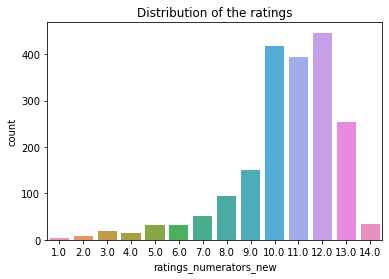

In [63]:
sns.countplot(x="ratings_numerators_new",data=Twitter_df)
plt.title("Distribution of the ratings")
plt.show()

#### Insight 1. 
Number of ratings between 10 and 13 are higher 

In [64]:
Twitter_df.Dogs_breed.value_counts().head(10)

Golden Retriever      135
Labrador Retriever     91
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Toy Poodle             37
Pomeranian             37
Malamute               29
Name: Dogs_breed, dtype: int64

#### Insight2

The code above shows the first 10 most frequently predicted dog breeds with the Golden Retriever being the most popular. Lets visualize this using a barplot


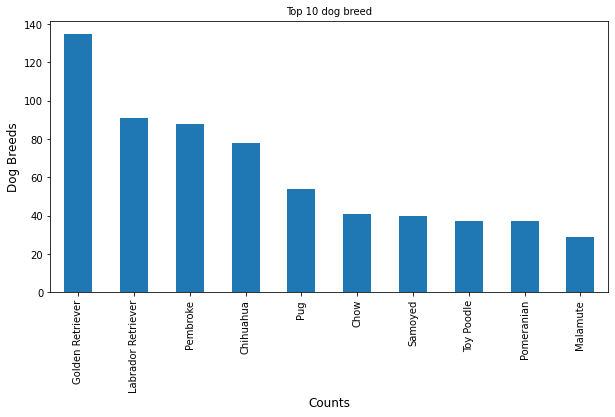

In [65]:
#Plot of the first 10 breeds with the most favourite counts
Breed=Twitter_df.Dogs_breed.value_counts().nlargest(10)
plt.figure(figsize=(10,5))
plt.title("Top 10 dog breed", size=10)
Breed.plot(kind='bar')
plt.xlabel('Counts', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);

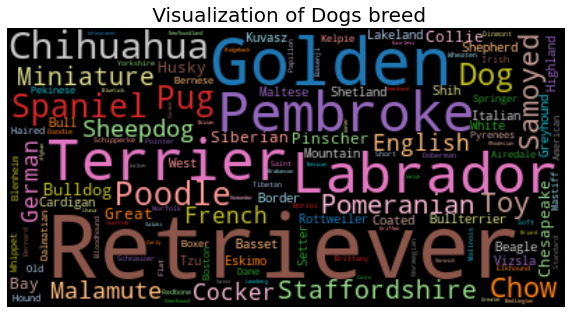

In [66]:
Dog= Twitter_df.loc[:, 'Dogs_breed'].str.cat(others=None, sep=' ')
wordcloud = WordCloud(
                random_state = 42, 
                background_color = 'black', 
                colormap = 'tab20',                       
                collocations = False, 
                stopwords = STOPWORDS, 
                contour_width = 2, 
                contour_color='yellow')

wordcloud.generate(Dog)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(' Visualization of Dogs breed', fontsize=20)
plt.axis('off');

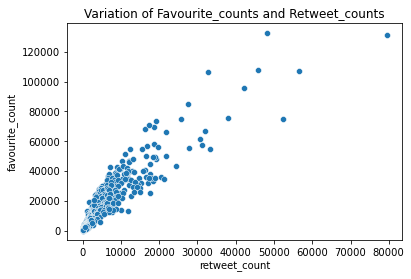

In [67]:
sns.scatterplot(x="retweet_count",
                y="favourite_count",data=Twitter_df)
plt.title("Variation of Favourite_counts and Retweet_counts")

plt.show()

The favourite counts and the retweet counts appears to be correlated. We can confirm this by ploting the correction line and printing the value.

Correlation between the two variables :  0.9132932875454647


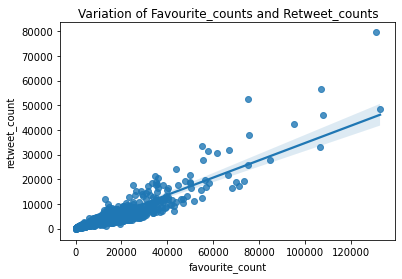

In [68]:
#Making a correlation plot
sns.regplot(x='favourite_count', y='retweet_count', data=Twitter_df)
plt.title("Variation of Favourite_counts and Retweet_counts")
data_corr = Twitter_df.corr()
print("Correlation between the two variables : ",data_corr.loc['favourite_count','retweet_count'])

#### Insight 3
Favourite counts and the retweet counts are positively correlated. 


### Analysis Summary

### Insights:
1. Ratings distribution is skewed left. Most of the ratings falls withing the values of 10 and 13 

2. The Golden retriever breed is the most popularly predicted breed in the dataset. 

3. A scatter plot of the favourite counts and retweet counts shows the two variables are positively correlated with correlation coefficient of 91%. 

### More  Visualization

In [69]:
#Getting the mean ratings for the dog_breeds and first 10 breeds with averagely high rating.
Group=Twitter_df.groupby('Dogs_breed')['ratings_numerators_new'].mean().sort_values(ascending=False).nlargest(10)

In [70]:
Group

Dogs_breed
Saluki                12.500000
Briard                12.333333
Tibetan Mastiff       12.250000
Border Terrier        12.142857
Silky Terrier         12.000000
Standard Schnauzer    12.000000
Eskimo Dog            11.777778
Gordon Setter         11.750000
Irish Setter          11.750000
Samoyed               11.700000
Name: ratings_numerators_new, dtype: float64

In [71]:
#Grouping by dogs breed and getting the favourite counts
Group2=Twitter_df.groupby('Dogs_breed')['favourite_count']

In [72]:
Group2=Group2.sum().sort_values(ascending=False).nlargest(10)

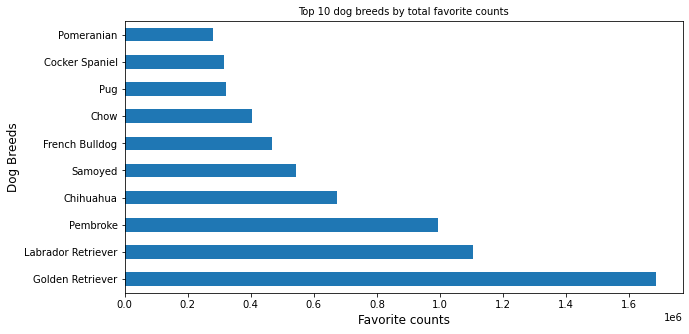

In [73]:
#Plot of the first 10 breeds with the most favourite counts
plt.figure(figsize=(10,5))
plt.title("Top 10 dog breeds by total favorite counts", size=10)
Group2.plot(kind='barh')
plt.xlabel('Favorite counts', fontsize=12)
plt.ylabel('Dog Breeds', fontsize=12);


The Golden retriever appeared to be the most favoured dog breed as can be seen in the chat above. It will be quite interesting to meet the champion dog breed which is popular and favoured by many. Hence in the next cells, we extract the images a golden retriever.

In [74]:
#Filtering for dogs whose breed is golden retriever and with high ratings 
Golden_retriever_df = Twitter_df.query('Dogs_breed == "Golden Retriever"')

Golden_ret_rated_df=Golden_retriever_df.sort_values(by='ratings_numerators_new', ascending = False)
Numb_one_rated_breed=Golden_ret_rated_df[['favourite_count','ratings_numerators_new','Dogs_breed','jpg_url']].head()


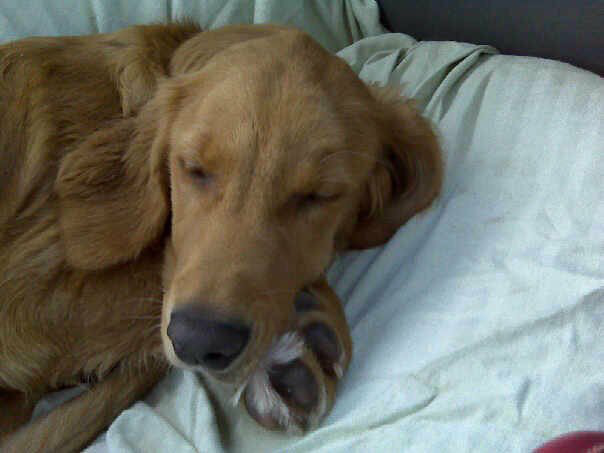

In [78]:
#Meet Golden Retriever with the most ratings
url = Numb_one_rated_breed.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [76]:
#Filtering for dogs whose breed is golden retriever and with high ratings 
Golden_retriever_df = Twitter_df.query('Dogs_breed == "Golden Retriever"')

Golden_ret_fave_df=Golden_retriever_df.sort_values(by='favourite_count', ascending = False)
Numb_one_fav_breed=Golden_ret_fave_df[['favourite_count','ratings_numerators_new','Dogs_breed','jpg_url']].head()

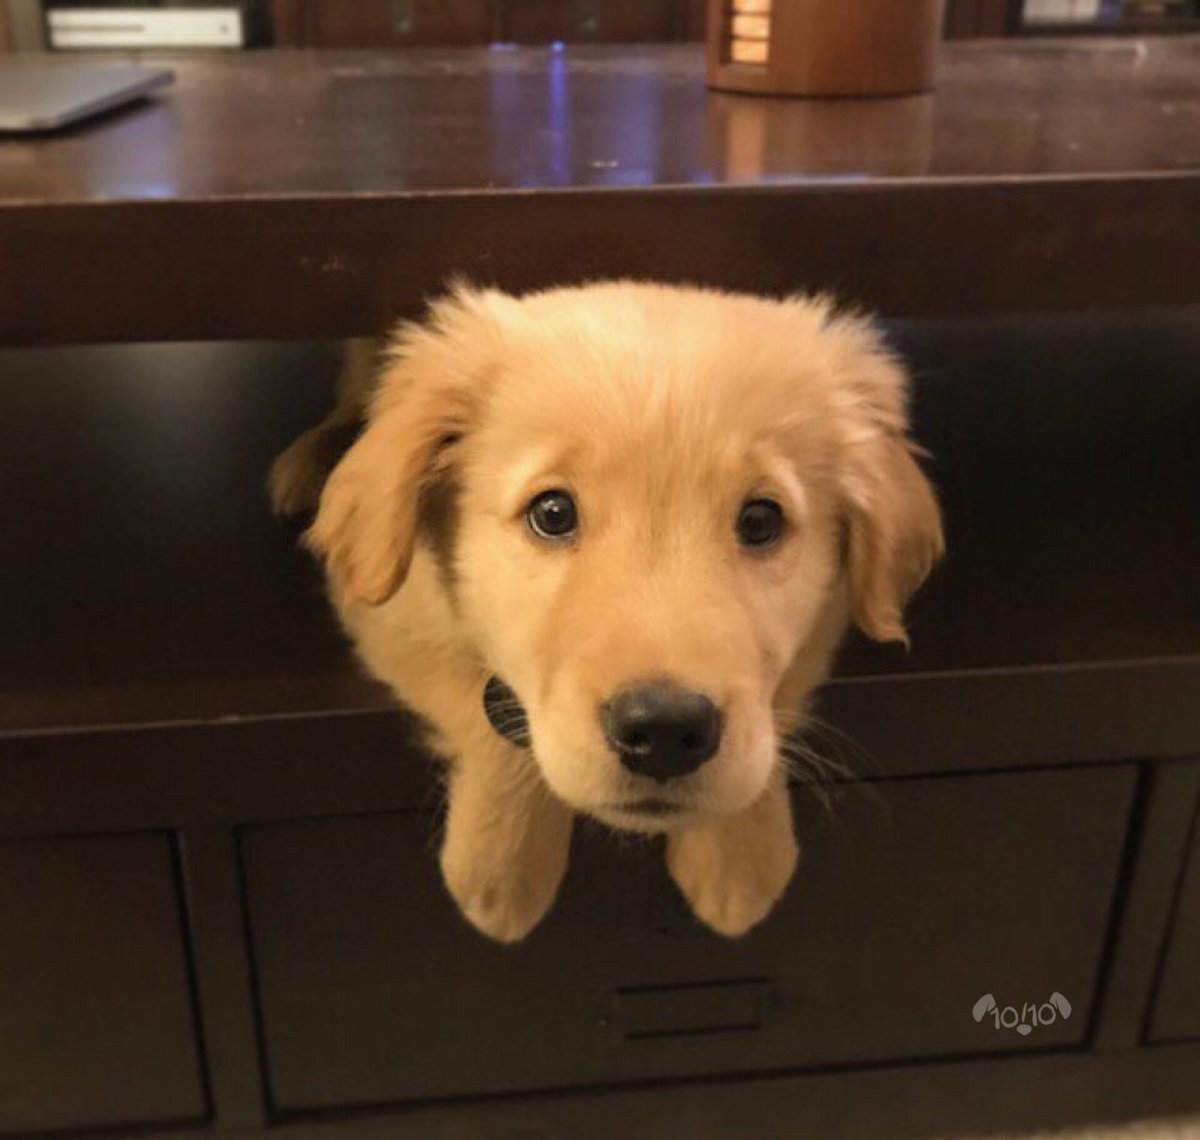

In [81]:
#Golden retriever with the most favorite counts
url = Numb_one_fav_breed.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

##### References

1. https://notebooks.githubusercontent.com/view/ipynb?browser=chrome&color_mode=auto&commit=e8b2234cd715aea8f846dccb5464c6507e9ffe1e&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f4675656e6a2f446174612d5772616e676c696e672d616e642d416e616c797a696e672d547769747465722d446174612f653862323233346364373135616561386638343664636362353436346336353037653966666531652f7772616e676c655f6163742e6970796e62&logged_in=false&nwo=Fuenj%2FData-Wrangling-and-Analyzing-Twitter-Data&path=wrangle_act.ipynb&platform=android&repository_id=314935190&repository_type=Repository&version=98  

2. https://www.geeksforgeeks.org/

3. https://en.wikipedia.org/wiki/Golden_Retriever